In [235]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import kde
import seaborn as sns

import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [270]:
#new anti correlated best
#55,56,59,63,83,94,95,100,121,125,131.2,            11
#strong signal medium anti correlation:
#43,80,98,102,103,Nenad                             5

#cs = ["slide_21","slide_22","slide_23","slide_24","slide_24","slide_31","slide_32","slide_33","slide_34","slide_35"]

lb = ["P055","P056","P059","P063","P083","P094","P095","P100","P121","P125","P131.2","P043","P080","P098","P102","P103","Nenad"]
cs = ["slide_21","slide_22","slide_23",#"slide_24","slide_25",
      "slide_26","slide_27","slide_28",#"slide_29","slide_30",
      "slide_31","slide_32","slide_33",#"slide_34","slide_35",
      "slide_36","slide_37"]#,"slide_39","slide_40"]

spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
a = spots_dj
spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)


In [271]:
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analyse_wepdata/analysis2.pyc'>

In [272]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(300).clean()

In [273]:
c_test_data = data.train_test_combinations["Test"][0]
c_train_data = data.train_test_combinations["Train"][0]



In [274]:
testd = data.subset_collection(c_test_data)
traind = data.subset_collection(c_train_data)

In [275]:
from matplotlib.lines import Line2D


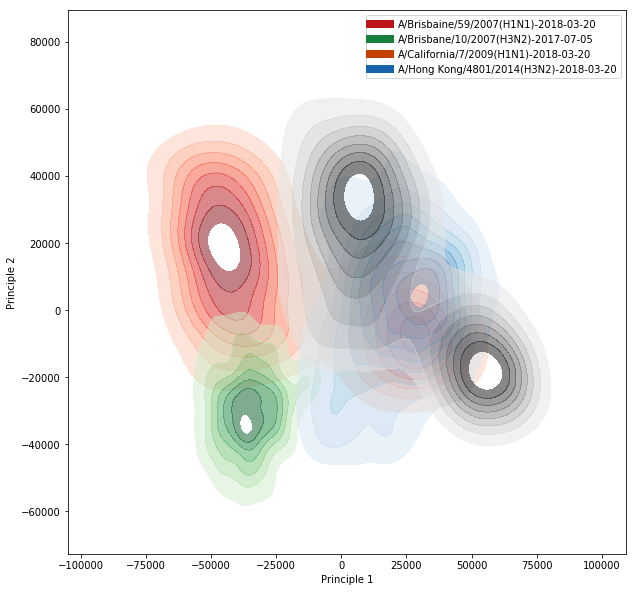

In [277]:

#data_ldatest = pd.DataFrame(traind.x_lda_fit().transform(testd.x),index=testd.x.index , columns =["Principle 1", "Principle 2"])
#data_ldatrain = pd.DataFrame(traind.x_lda_fit().transform(traind.x),index=traind.x.index , columns =["Principle 1", "Principle 2"])
data_ldatest = pd.DataFrame(traind.x_pca_fit().transform(testd.x),index=testd.x.index , columns =["Principle 1", "Principle 2"])
data_ldatrain = pd.DataFrame(traind.x_pca_fit().transform(traind.x),index=traind.x.index , columns =["Principle 1", "Principle 2"])
data_lda = pd.DataFrame(data.x_pca_fit().transform(data.x),index=data.x.index , columns =["Principle 1", "Principle 2"])

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(ax):
    a=[]
    for n,d in data_ldatrain.groupby("Analyte Batch"):
        a.append(n)
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)


        

    #nbins = 20

    #k = kde.gaussian_kde((x.values,y.values))
    #xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    #zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    #ax.contour(xi, yi, zi.reshape(xi.shape), c=c)
fig, ax = plt.subplots(figsize=(10,10))
#lda_plot(data_ldatrain,ax,contour=True,alpha=0.5)
#lda_plot(data_ldatest,ax,contour=True,alpha=0.5)
lda_plot(data_lda,ax,contour=True,alpha=0.5)

add_legend(ax)


#lda_plot(data_ldatest,ax,marker="x")

plt.show()